<a href="https://colab.research.google.com/github/Zeitgeist-BuiTrungHieu/Stress-level-om-students/blob/main/stress_level_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [22]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("wardabilal/student-stress-analysis")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'student-stress-analysis' dataset.
Path to dataset files: /kaggle/input/student-stress-analysis


In [23]:
import os

df=pd.read_csv(path + '/' + os.listdir(path).pop())
df.head()

,Timestamp,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
0,27/10/2023 21:54:15,3,1,3,4,2,3
1,28/10/2023 12:24:40,4,1,2,3,3,2
2,28/10/2023 12:24:51,2,1,2,1,4,4
3,28/10/2023 12:26:11,3,2,3,2,3,3
4,28/10/2023 12:26:45,2,3,1,5,5,3


In [24]:
df = df.rename(columns={'Kindly Rate your Sleep Quality 😴':'sleep_quality',
                       'How many times a week do you suffer headaches 🤕?':'headache',
                        'How would you rate you academic performance 👩‍🎓?':'academic_performance',
                        'how would you rate your study load?':'study_load',
                        'How many times a week you practice extracurricular activities 🎾?':'leisure_activities',
                        'How would you rate your stress levels?':'stress_level'})
df = df.drop(columns=['Timestamp'])
df.head()

,sleep_quality,headache,academic_performance,study_load,leisure_activities,stress_level
0,3,1,3,4,2,3
1,4,1,2,3,3,2
2,2,1,2,1,4,4
3,3,2,3,2,3,3
4,2,3,1,5,5,3


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   sleep_quality         53 non-null     int64
 1   headache              53 non-null     int64
 2   academic_performance  53 non-null     int64
 3   study_load            53 non-null     int64
 4   leisure_activities    53 non-null     int64
 5   stress_level          53 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [26]:
df.describe()

,sleep_quality,headache,academic_performance,study_load,leisure_activities,stress_level
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,3.150943,1.981132,3.226415,2.811321,2.886792,2.792453
std,1.199298,1.263246,1.154281,1.428509,1.449939,1.377826
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000
50%,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000
75%,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [27]:
df.isnull().sum()

,0
sleep_quality,0
headache,0
academic_performance,0
study_load,0
leisure_activities,0
stress_level,0


In [28]:
df.duplicated().sum()

np.int64(0)

In [29]:
for col in df.columns:
    print(f'{col}: {np.sort(df[col].unique())}')

sleep_quality: [1 2 3 4 5]
headache: [1 2 3 4 5]
academic_performance: [1 2 3 4 5]
study_load: [1 2 3 4 5]
leisure_activities: [1 2 3 4 5]
stress_level: [1 2 3 4 5]


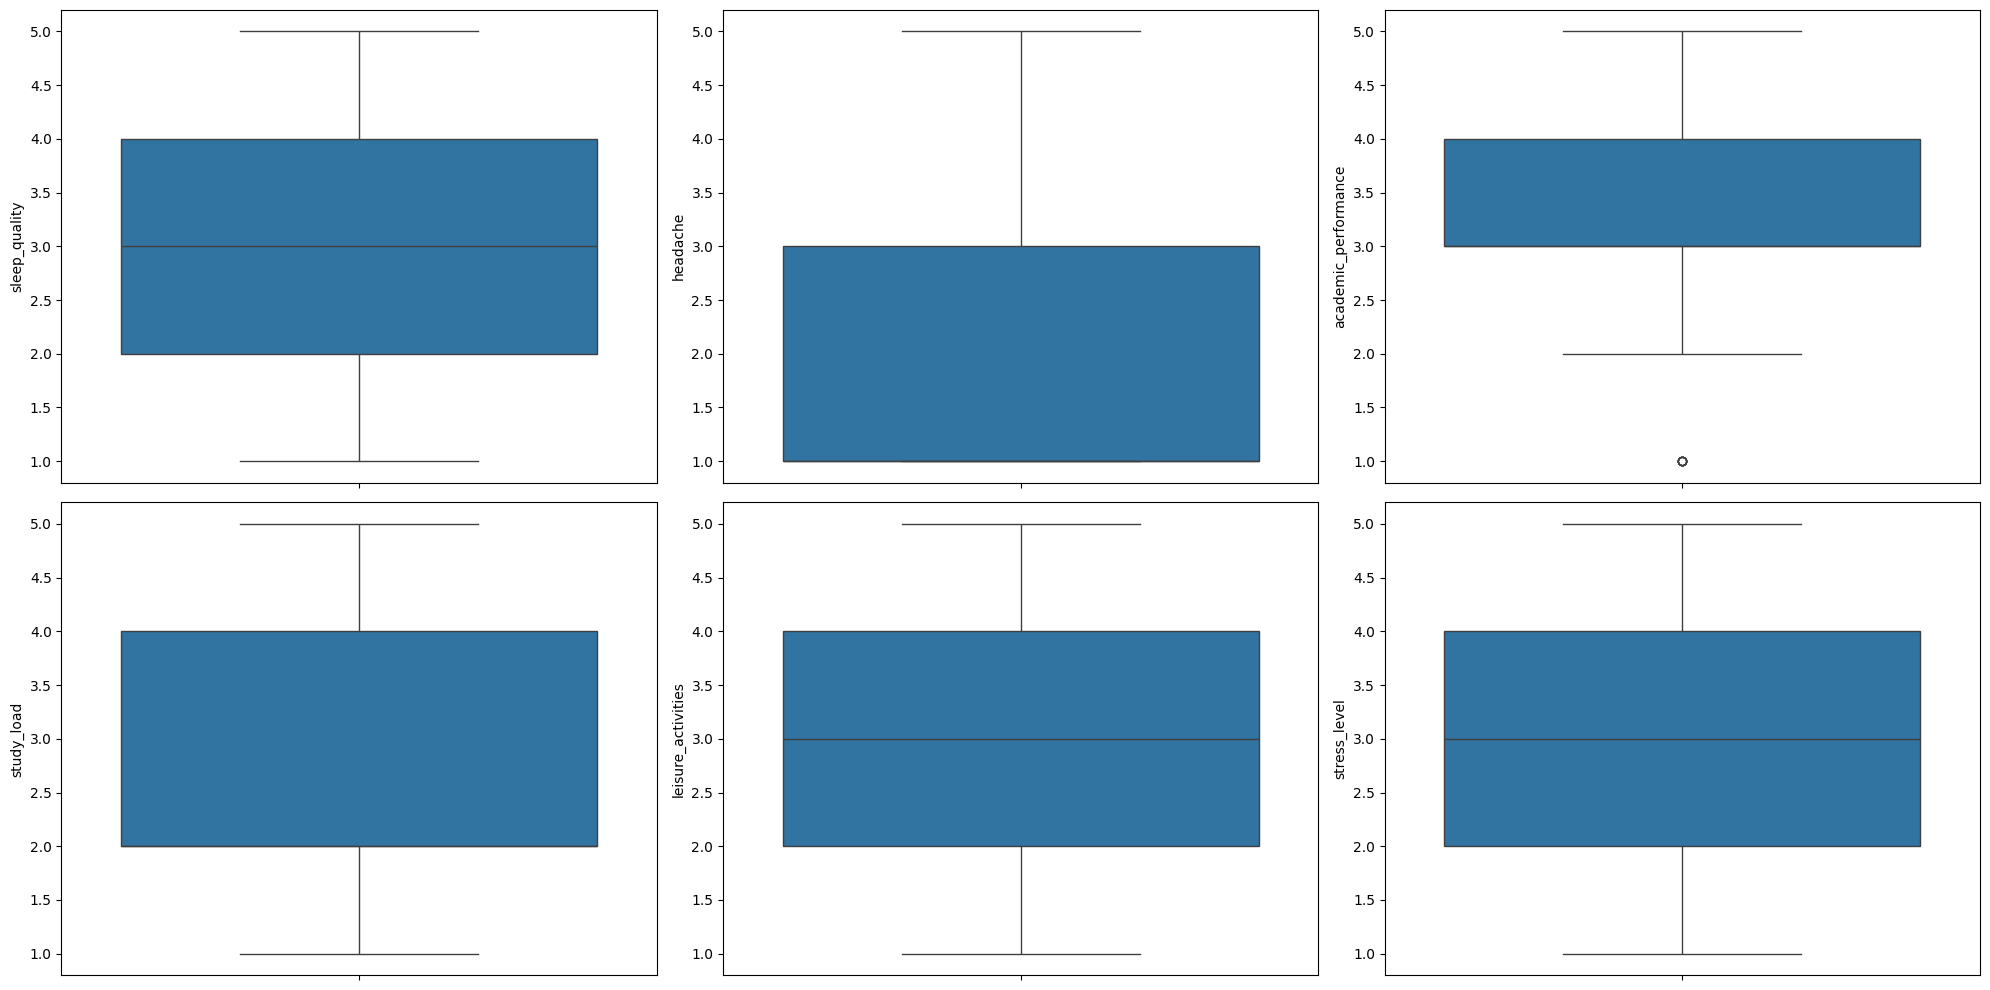

In [30]:
plt.figure(figsize=(20,10))

numerical_cols = df.select_dtypes(include=np.number).columns

for i, col in enumerate(numerical_cols):
    plt.subplot(2,3,i+1)  # Fix: Add 1 to the 0-based index
    sns.boxplot(df[col])

plt.tight_layout()
plt.show()

In [31]:
outlier = df.query('academic_performance == 1')
outlier

,sleep_quality,headache,academic_performance,study_load,leisure_activities,stress_level
4,2,3,1,5,5,3
6,3,5,1,4,3,5
7,4,3,1,4,1,1
17,1,1,1,1,1,2
36,4,1,1,2,4,5
49,1,1,1,2,3,1


# Visualization

<Axes: >

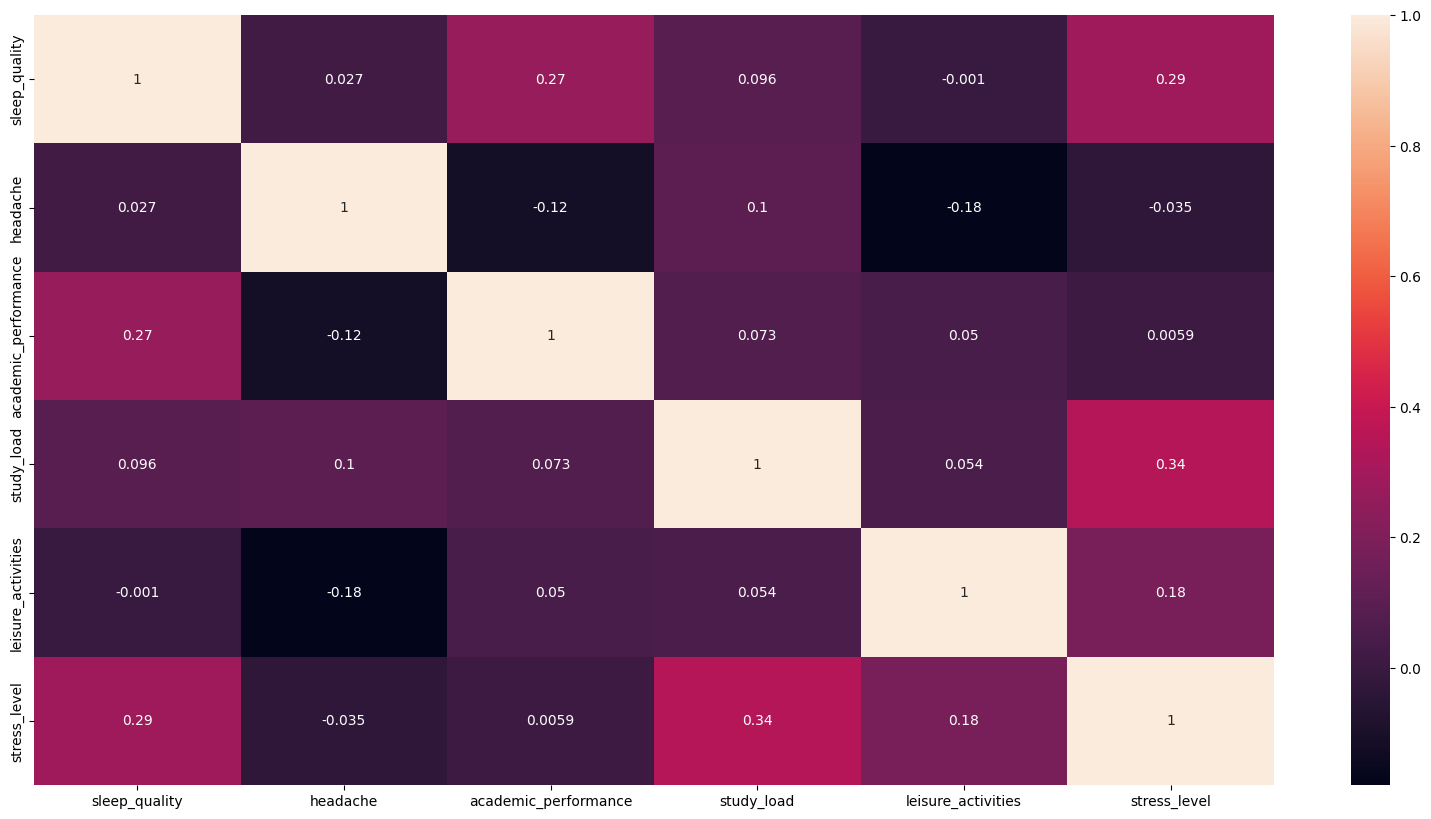

In [32]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

Overall, there are 3 key relationship to be discussed:
* Sleep quality on stress level and academic performance.
* Study load and leisure activites on stress level.
* Leisure activities and acacdemic performance on headache.

## Sleep quality on stress level and academic performance

Text(0, 0.5, 'Count')

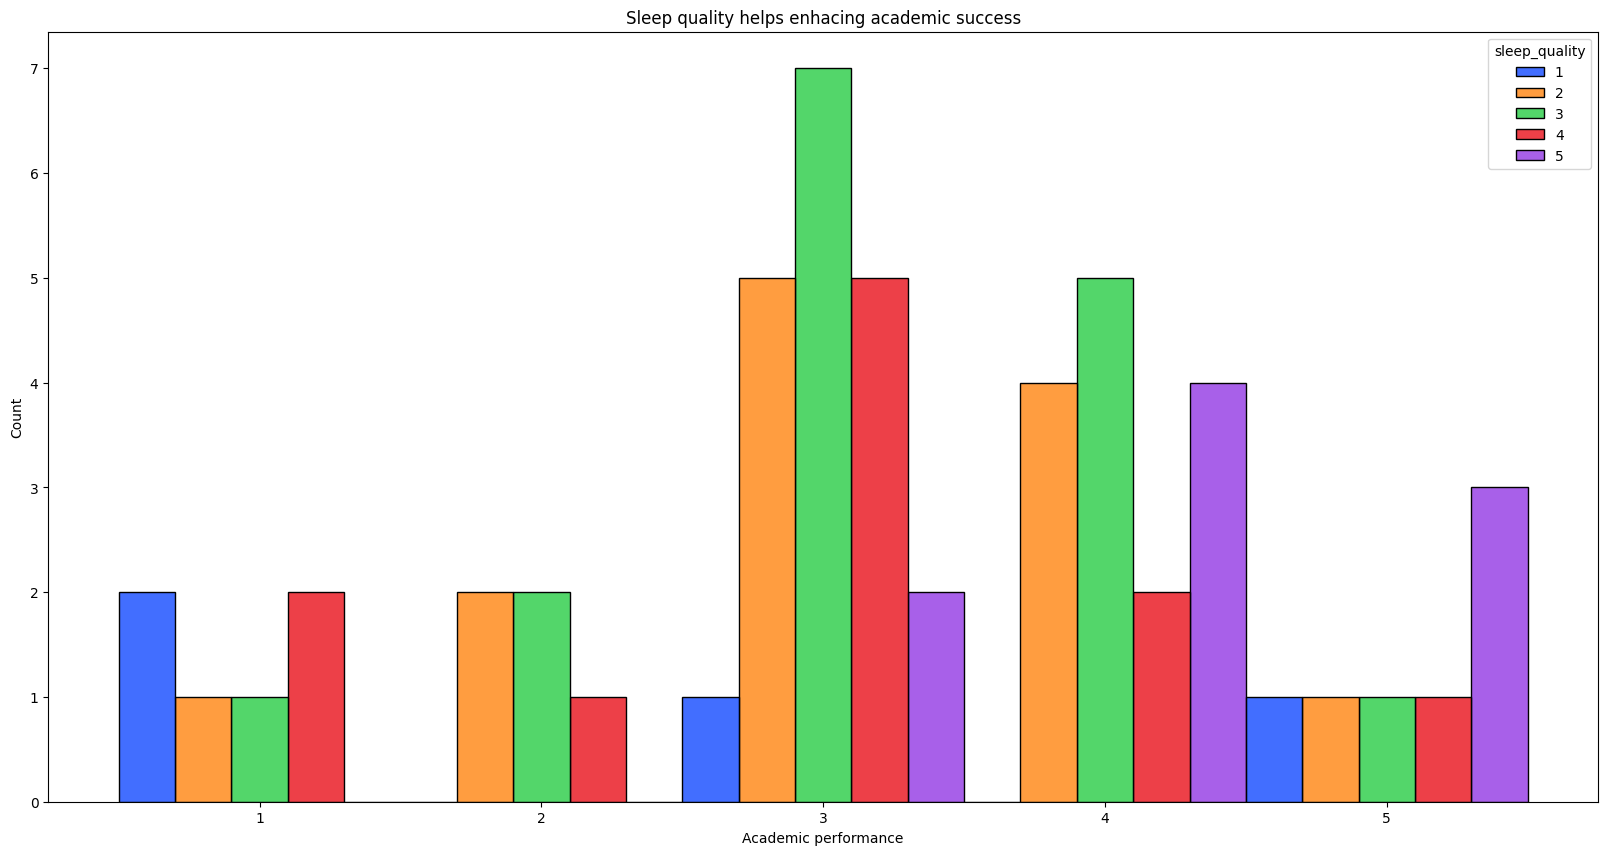

In [46]:
plt.figure(figsize=(20,10))
sns.histplot(data=df, x='academic_performance', hue='sleep_quality', multiple='dodge', palette='bright', discrete=True)
plt.xticks(sorted(df['sleep_quality'].unique()))
plt.title('Sleep quality helps enhacing academic success')
plt.xlabel('Academic performance')
plt.ylabel('Count')

Look at the bar graph, a good-noght sleep makes a positive effect on the academic performance. In fact, students who scored 5 on their sleep quality have their performance above average. On the other hand, most of the students answering 1 on the survey have a subpar academic performance.

In [38]:
outlier1 = df.query('academic_performance == 5 and sleep_quality == 1')
outlier1

,sleep_quality,headache,academic_performance,study_load,leisure_activities,stress_level
51,1,1,5,1,5,1


This table says that he/she sacrified their sleep to have a good grade, which paid off with a high academic performance, but his/her stress level was also at risk.

Text(0, 0.5, 'Count')

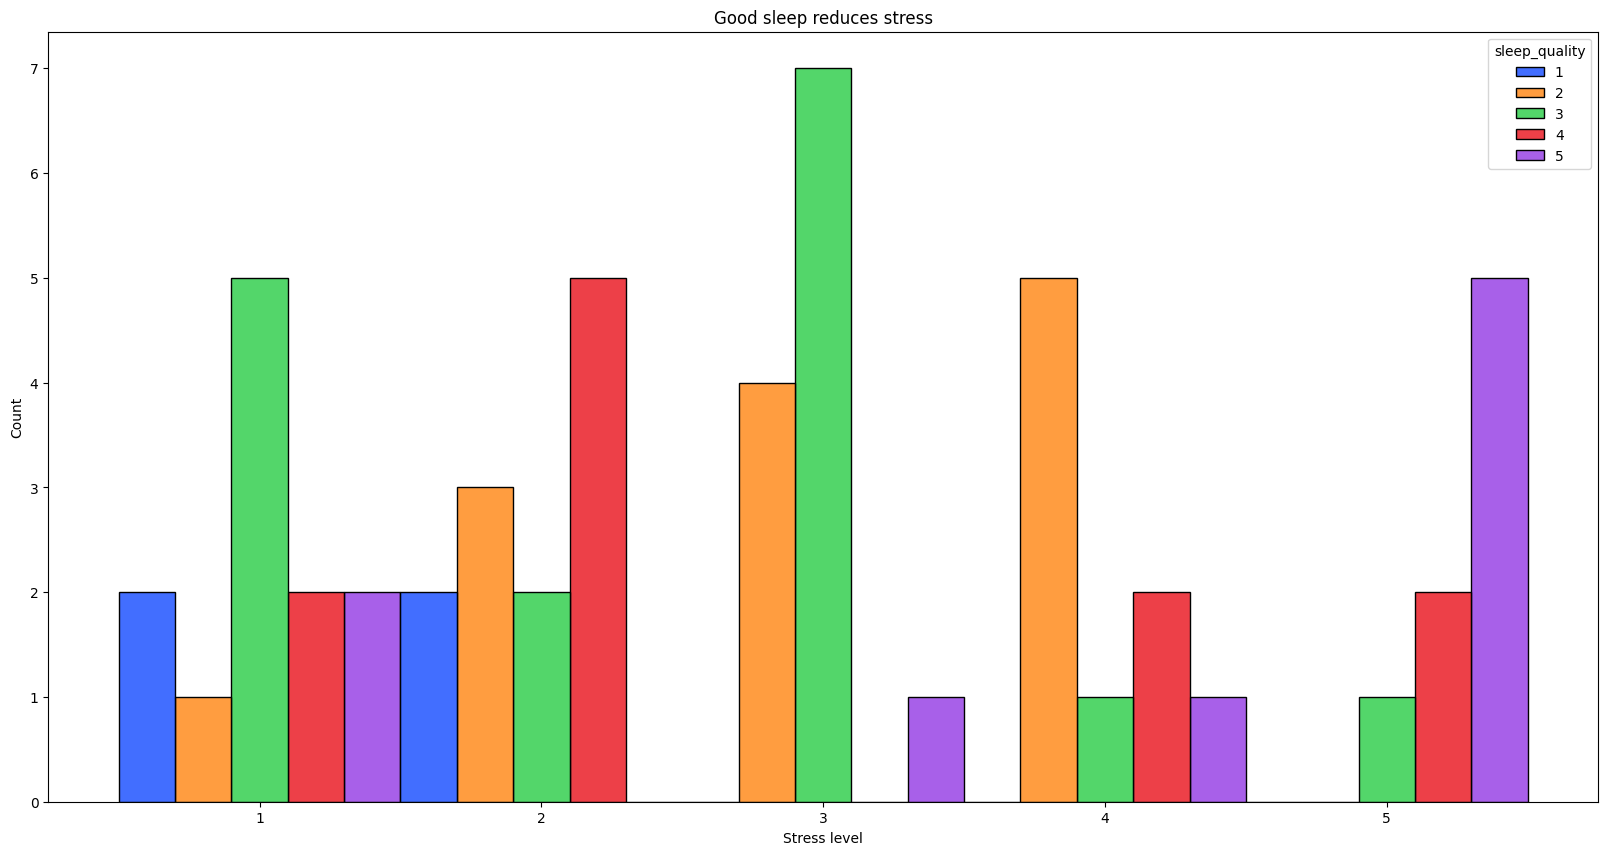

In [45]:
plt.figure(figsize=(20,10))
sns.histplot(data=df, x='stress_level', hue='sleep_quality', multiple='dodge', palette='bright', discrete=1)
plt.xticks(sorted(df['stress_level'].unique()))
plt.title('Good sleep reduces stress')
plt.xlabel('Stress level')
plt.ylabel('Count')

Most people who have good quality of sleep experience a stress-free life. Meanwhile, people with subpar sleep have high stress level. However, some still experience high stress level after a good-night sleep.

In [36]:
outlier2 = df.query('stress_level == 1 and sleep_quality==5')
outlier2

,sleep_quality,headache,academic_performance,study_load,leisure_activities,stress_level
24,5,1,4,2,1,1
27,5,5,5,1,1,1


Look at the table, we can see that they lack of free-time activities, which is the topic in the next session.

All in all, a good sleep will reduce stress level, as well as helping you study better.

# Study load and leisure activites on stress level

Text(0, 0.5, 'Count')

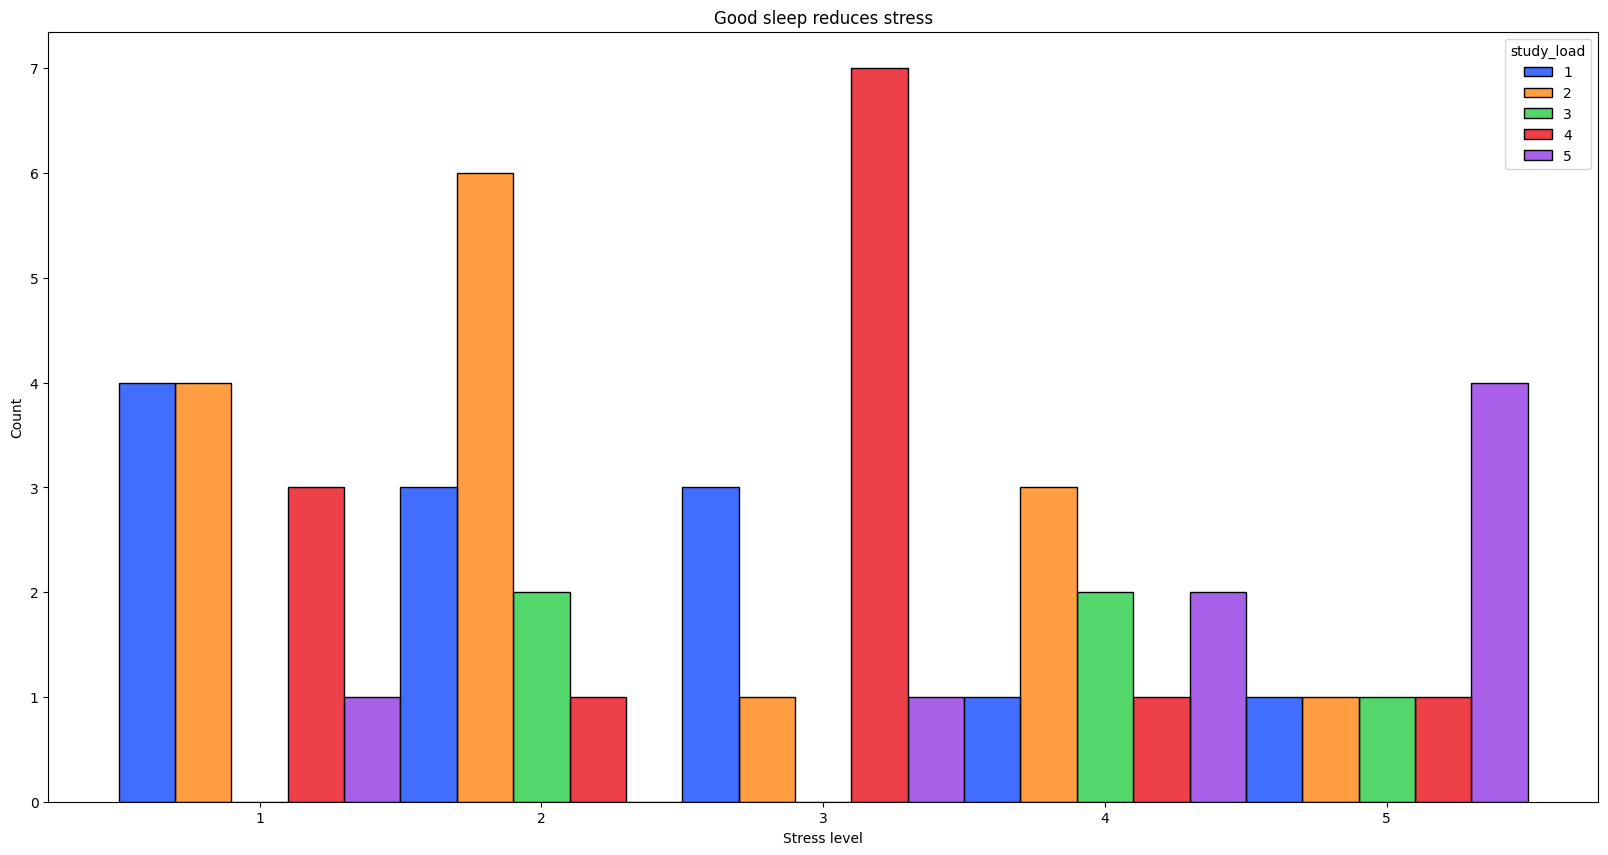

In [47]:
plt.figure(figsize=(20,10))
sns.histplot(data=df, x='stress_level', hue='study_load', multiple='dodge', palette='bright', discrete=1)
plt.xticks(sorted(df['stress_level'].unique()))
plt.title('Heavy study load puts pressure on students')
plt.xlabel('Stress level')
plt.ylabel('Count')

Most of bad level of stress can be traced back to heavy study load. In contrast, students with easier study load have less problem dealing with stressfulness.

Text(0, 0.5, 'Count')

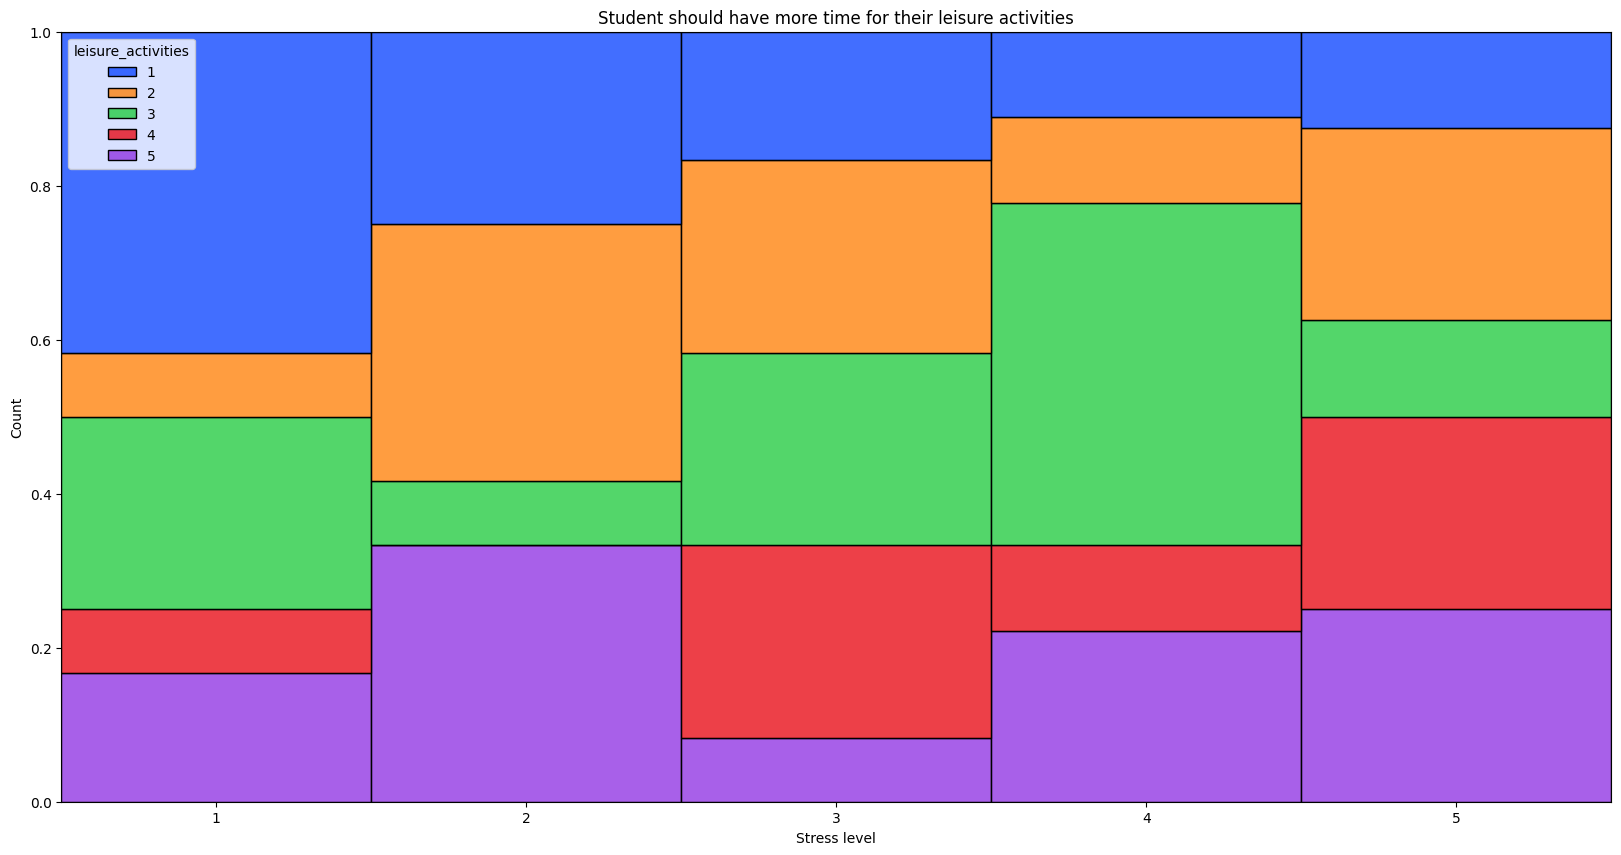

In [50]:
plt.figure(figsize=(20,10))
sns.histplot(data=df, x='stress_level', hue='leisure_activities', multiple='fill', palette='bright', discrete=1)
plt.xticks(sorted(df['stress_level'].unique()))
plt.title('Student should have more time for their leisure activities')
plt.xlabel('Stress level')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

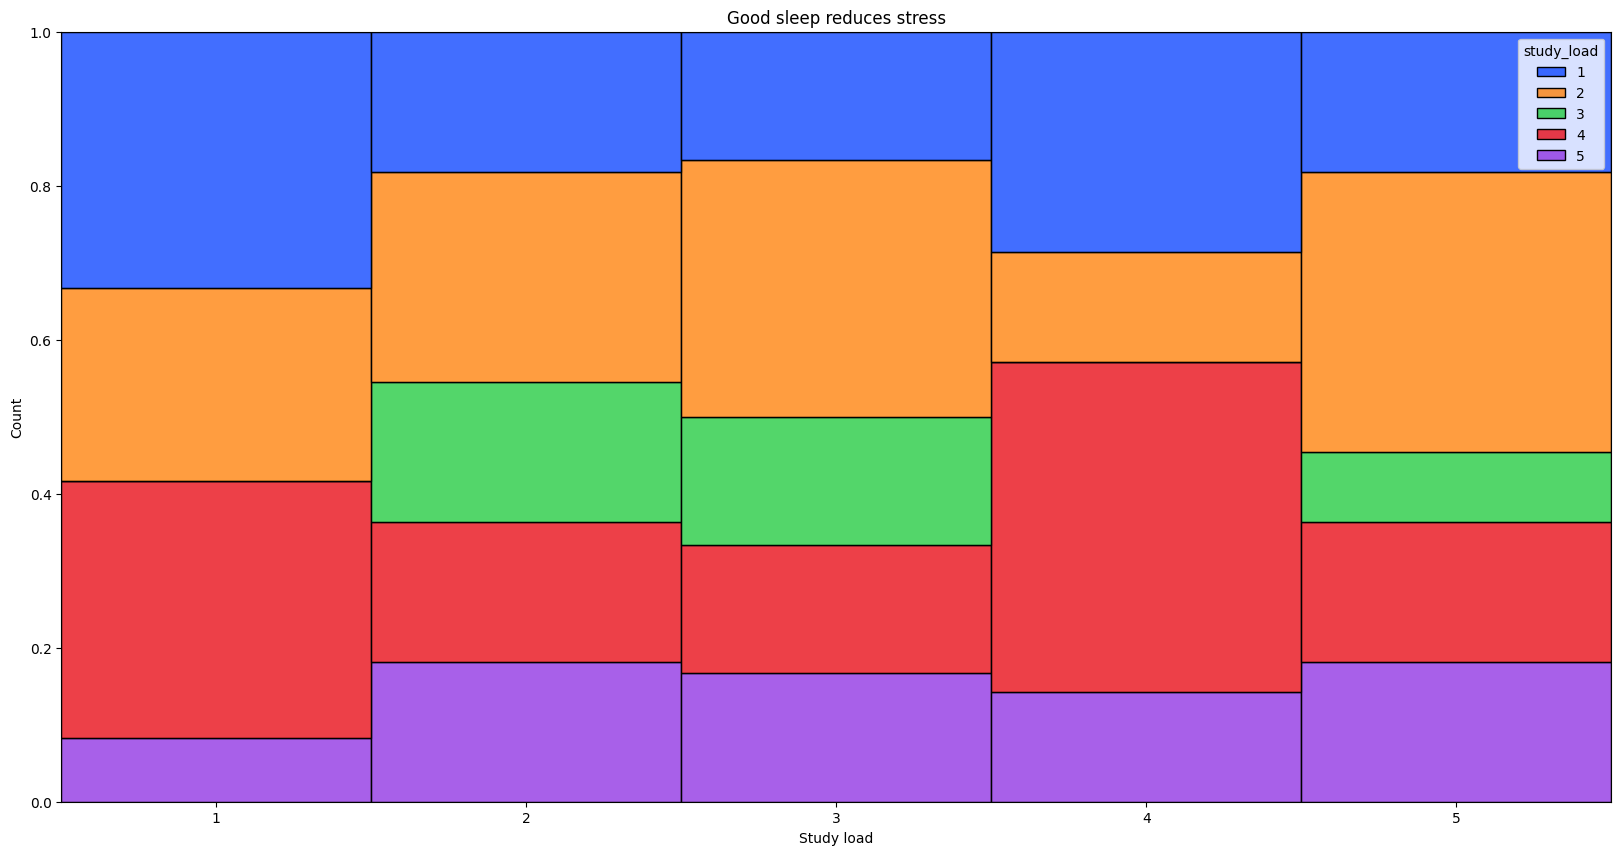

In [56]:
plt.figure(figsize=(20,10))
sns.histplot(data=df, x='leisure_activities', hue='study_load', multiple='fill', palette='bright', discrete=1)
plt.xticks(sorted(df['leisure_activities'].unique()))
plt.title('Good sleep reduces stress')
plt.xlabel('Study load')
plt.ylabel('Count')

However, there is no relationship between time on study and that on free-time activities. It can be because some students spend time on part-time jobs, or on their voluntary work to build up their resumes.